In [1]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from deep_convnet import DeepConvNet
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()  
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보관
network.save_params("deep_convnet_params.pkl")
print("Saved Network Parameters!")

train loss:2.2540902464637327
=== epoch:1, train acc:0.107, test acc:0.112 ===
train loss:2.251428322320407
train loss:2.3070809090562934
train loss:2.3012053773624386
train loss:2.291659229612513
train loss:2.281482153839448
train loss:2.286839030009389
train loss:2.2835117901791193
train loss:2.280885343105764
train loss:2.278649300675743
train loss:2.27826423999992
train loss:2.2769565590562806
train loss:2.2714674981770706
train loss:2.258797445495268
train loss:2.2812261500268116
train loss:2.2611291422194317
train loss:2.2303147907176886
train loss:2.2793805367949598
train loss:2.246239014048766
train loss:2.229922332439689
train loss:2.2330692263328755
train loss:2.229886496692957
train loss:2.2277046092347677
train loss:2.1045423647252415
train loss:2.265706170271988
train loss:2.179444506354871
train loss:2.1534693480416127
train loss:2.1247216344717303
train loss:2.1365622364120123
train loss:2.173875608419122
train loss:2.232304883037054
train loss:2.156923849237877
train lo

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")

sampled = 10000 # 고속화를 위한 표본추출
x_test = x_test[:sampled]
t_test = t_test[:sampled]

print("caluculate accuracy (float64) ... ")
print(network.accuracy(x_test, t_test))

# float16(반정밀도)로 형변환
x_test = x_test.astype(np.float16)
for param in network.params.values():
    param[...] = param.astype(np.float16)

print("caluculate accuracy (float16) ... ")
print(network.accuracy(x_test, t_test))

caluculate accuracy (float64) ... 
0.9926
caluculate accuracy (float16) ... 
0.9926


calculating test accuracy ... 
test accuracy:0.9926
======= misclassified result =======
{view index: (label, inference), ...}
{1: (4, 9), 2: (6, 5), 3: (6, 0), 4: (4, 9), 5: (3, 5), 6: (8, 2), 7: (6, 4), 8: (2, 1), 9: (1, 7), 10: (7, 4), 11: (3, 5), 12: (3, 5), 13: (8, 9), 14: (6, 5), 15: (9, 4), 16: (7, 1), 17: (1, 6), 18: (6, 0), 19: (2, 7), 20: (9, 4)}


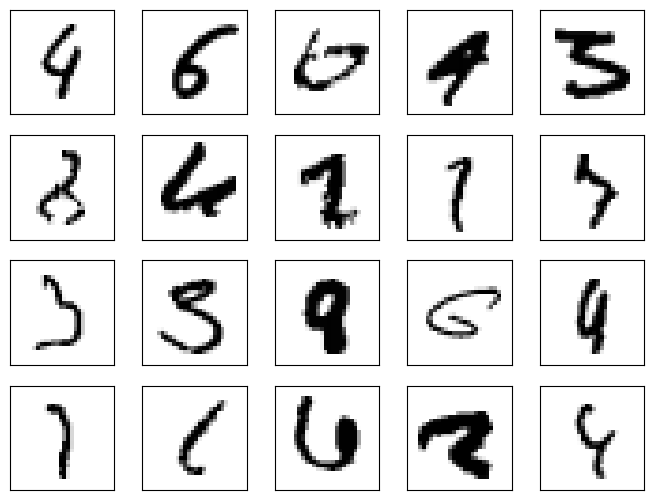

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")

print("calculating test accuracy ... ")
#sampled = 1000
#x_test = x_test[:sampled]
#t_test = t_test[:sampled]

classified_ids = []

acc = 0.0
batch_size = 100

for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False)
    y = np.argmax(y, axis=1)
    classified_ids.append(y)
    acc += np.sum(y == tt)
    
acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

classified_ids = np.array(classified_ids)
classified_ids = classified_ids.flatten()
 
max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test):
    if not val:
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        mis_pairs[current_view] = (t_test[i], classified_ids[i])
            
        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()

In [ ]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=False)
x_train[0]

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=False)
x_train[0]

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            -> 이거 전체에 대해 나누는거야 전체 elment-wise

    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1
            
        return T    
        

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

In [ ]:
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common.layers. import *

class DeepConvNet:
    """ 정확도 99% 이상의 고정밀 합성곱 신경망CNN
    (채널 수 더 늘어나고, 중간 데이터 공간 크기 줄여나감)
    
    conv - relu - conv - relu - pool -
    conv - relu - conv - relu - pool -
    conv - relu - conv - relu - pool - 
    affine - relu - dropout - affine - dropout - softmax

    He 초깃값 & ReLU & Adam optimizer & dropout
    필터 3x3 (small)
    """
    def __init__(self, input_dim=(1, 28, 28),
                 # 채널 수 점 점 늘어남
                 conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1}, 
                 conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_7 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=50, output_size=10):
        
        # 1. 가중치filter 초기화====================================================================
        # 각 층의 뉴런 하나당 앞 층의 몇 개 뉴런과 연결되는가 (N)
        pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*3*3, hidden_size])
        weight_init_scales = np.sqrt(2.0 / pre_node_nums) # He 초깃값 (ReLu 사용시 권장)